#TP09

In [19]:
from google.colab import files
#uploaded = files.upload()

KeyboardInterrupt: ignored

Exo1

In [20]:
import pandas as pd
prices_dataset = pd.read_csv('data.csv', header = 0)

In [21]:
prices_dataset

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


Exo2

In [22]:
yahoo = prices_dataset[prices_dataset['symbol']=='YHOO']
yahoo

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
...,...,...,...,...,...,...,...
849257,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0
849757,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
850257,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0
850757,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0


In [23]:
yahoo_stock_prices = yahoo.values[:,-2].astype('float32')
yahoo_stock_prices.shape

(1762,)

In [24]:
yahoo_stock_prices = yahoo_stock_prices.reshape(yahoo_stock_prices.shape[0], 1)


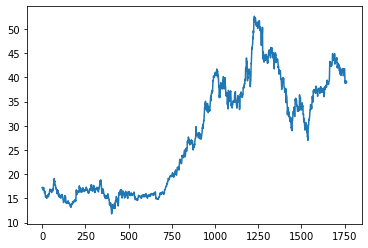

In [25]:
import matplotlib.pyplot as plt

plt.plot(yahoo_stock_prices)
plt.show()

Exo3

In [26]:
train_size = int(len(yahoo_stock_prices) * 0.80)
test_size = len(yahoo_stock_prices) - train_size
train, test = yahoo_stock_prices[0:train_size,:], yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]
print(len(train), len(test))

1409 353


Exo4

In [27]:
train

array([[17.2 ],
       [17.23],
       [17.3 ],
       ...,
       [37.71],
       [37.52],
       [36.76]], dtype=float32)

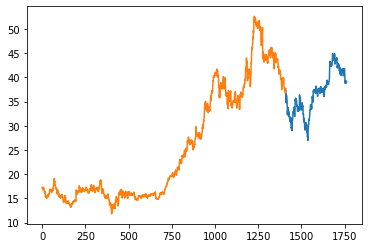

In [28]:
plt.plot(range(train_size, len(yahoo_stock_prices)) , test)
plt.plot(range(0 ,train_size) ,train)

In [29]:
import numpy as np
def create_dataset(dataset, look_back=5):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [30]:
# reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [31]:
print(trainX. shape)
#print (trainX)
print(trainY.shape)
#print (trainY)
print (testX.shape)
print (testY.shape)

(1404, 5)
(1404,)
(348, 5)
(348,)


In [32]:
trainX.shape

(1404, 5)

In [33]:
trainX = np.reshape (trainX, (trainX.shape [0], trainX.shape [1],1 ))
testX = np.reshape (testX, (testX.shape[0], testX.shape [1], 1))

In [34]:
#print (trainX)
print(trainX.shape)
print(trainY.shape)

(1404, 5, 1)
(1404,)


In [35]:
trainX[0]

array([[17.2 ],
       [17.23],
       [17.3 ],
       [16.9 ],
       [16.76]], dtype=float32)

In [36]:
trainY[0]

16.83

Exo5

In [38]:
#from subprocess import check_output
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
#from sklearn.cross_validation import  train_test_split
import time 

model = Sequential()

model.add(LSTM(input_shape=(look_back,1), units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(input_shape=(look_back,1), units=20, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation ='linear'))

model.summary()
#The number of parameters of LSTM, taking input vectors of size m and giving output vectors of size n is:
#4(nm+n^2+n)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 100)            40800     
                                                                 
 dropout_2 (Dropout)         (None, 5, 100)            0         
                                                                 
 lstm_3 (LSTM)               (None, 5, 20)             9680      
                                                                 
 dropout_3 (Dropout)         (None, 5, 20)             0         
                                                                 
 lstm_4 (LSTM)               (None, 50)                14200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [40]:
model.compile(loss='mse', optimizer='nadam')

In [41]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=150,
    validation_split=0.05)

Epoch 1/150
11/11 [==============================] - 10s 211ms/step - loss: 711.2965 - val_loss: 1614.5928
Epoch 2/150
11/11 [==============================] - 0s 25ms/step - loss: 630.0838 - val_loss: 1371.9414
Epoch 3/150
11/11 [==============================] - 0s 29ms/step - loss: 479.0512 - val_loss: 1117.5975
Epoch 4/150
11/11 [==============================] - 0s 27ms/step - loss: 376.4467 - val_loss: 979.7981
Epoch 5/150
11/11 [==============================] - 0s 28ms/step - loss: 325.0721 - val_loss: 898.8785
Epoch 6/150
11/11 [==============================] - 0s 29ms/step - loss: 294.7529 - val_loss: 842.1718
Epoch 7/150
11/11 [==============================] - 0s 29ms/step - loss: 272.7796 - val_loss: 798.2153
Epoch 8/150
11/11 [==============================] - 0s 28ms/step - loss: 256.9358 - val_loss: 761.6085
Epoch 9/150
11/11 [==============================] - 0s 28ms/step - loss: 240.9847 - val_loss: 728.9640
Epoch 10/150
11/11 [==============================] - 0s 30

Exo7

11/11 [==============================] - 1s 5ms/step


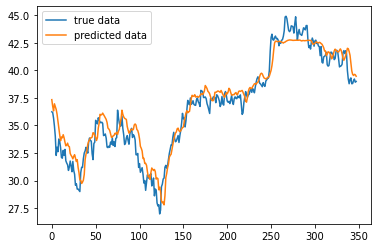

In [42]:
import matplotlib.pyplot as plt
predicted = model.predict(testX)
plt.plot(testY, label = 'true data')
plt.plot(predicted, label = 'predicted data')
plt.legend()
plt.show()

In [43]:
from google.colab import files
uploaded = files.upload ()

Saving poems.txt to poems.txt


In [44]:
from __future__ import absolute_import, division, print_function, unicode_literals 
  
import numpy as np 
import tensorflow as tf 
  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.layers import LSTM 
  
from tensorflow.keras.optimizers import RMSprop 
  
from tensorflow.keras.callbacks import LambdaCallback 
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.callbacks import ReduceLROnPlateau 
import random 
import sys 

Exo9

In [45]:
# Reading the text file into a string 
with open('poems.txt', 'r') as file: 
	text = file.read() 

# A preview of the text file	 
print(text) 

﻿Buffalo Bill’s
defunct
who used to
ride a watersmooth-silver
stallion
and break one two three four five pigeons just like that
Jesus

he was a handsome man
and what i want to know is
how do you like your blueeyed boy
Mister Death

Had I the heaven’s embroidered cloths,
Enwrought with golden and silver light,
The blue and the dim and the dark cloths
Of night and light and the half-light,
I would spread the cloths under your feet:
But I, being poor, have only my dreams;
I have spread my dreams under your feet;
Tread softly because you tread on my dreams.

He clasps the crag with crooked hands;
Close to the sun in lonely lands,
Ring’d with the azure world, he stands.

The wrinkled sea beneath him crawls;
He watches from his mountain walls,
And like a thunderbolt he falls.

Some say the world will end in fire,
Some say in ice.
From what I’ve tasted of desire
I hold with those who favor fire.
But if it had to perish twice,
I think I know enough of hate
To say that for destruction ice
Is al

Exo10

In [46]:
# Storing all the unique characters present in the text 
vocabulary = sorted(list(set(text))) 

In [47]:
# Dividing the text into subsequences of length max length
# So that at each time step the next max length characters
# are fed into the network
max_length = 100
steps = 5
sentences = []
next_chars = []
for i in range(0, len(text) - max_length, steps) :
  sentences.append(text[i: i + max_length])
  next_chars.append(text[i + max_length])

Exo11